In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combo_df = pd.merge(city_df, ride_df, how="outer", on="city")


# Display the data table for preview
combo_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

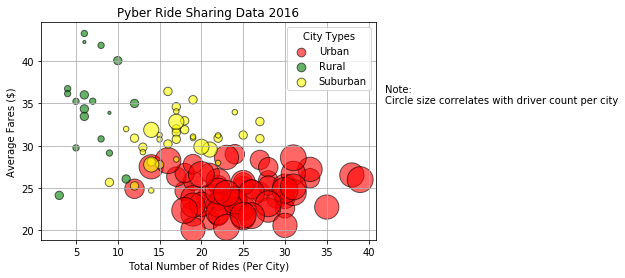

In [5]:
# Obtain the x and y coordinates for each of the three city types
#x cord total num of rides per city 
# y is avg fare in dollars 
Urban_df = combo_df[combo_df['type']=='Urban']
Urban_x = Urban_df.groupby("city")['ride_id'].count()
Urban_y = Urban_df.groupby("city")['fare'].mean()

Rural_df = combo_df[combo_df['type']=='Rural']
Rural_x = Rural_df.groupby("city")['ride_id'].count()
Rural_y = Rural_df.groupby("city")['fare'].mean()

Sub_df = combo_df[combo_df['type']=='Suburban']
Sub_x = Sub_df.groupby("city")['ride_id'].count()
Sub_y = Sub_df.groupby("city")['fare'].mean()


# Build the scatter plots for each city types
plt.scatter(Urban_x, Urban_y, edgecolors="black", alpha = 0.6, facecolors = "red", 
            label = "Urban", s=Urban_df.driver_count*10)
plt.scatter(Rural_x, Rural_y, edgecolors="black", alpha= 0.6, facecolors = "green",
            label = "Rural", s=Rural_df.driver_count*10)
plt.scatter(Sub_x, Sub_y, edgecolors="black", alpha= 0.6, facecolors = "yellow",
            label = "Suburban", s=Sub_df.driver_count*10)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")
plt.grid()

# Create a legend
legend= plt.legend(loc="best", title = "City Types")
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]


# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city", fontsize = 10)

# Save Figure
plt.savefig("../Images/RideScatter.png")

In [6]:
# Show plot
plt.show()

## Total Fares by City Type

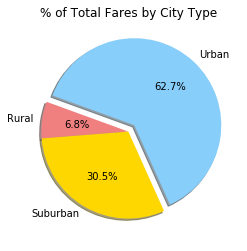

In [7]:
# Calculate Type Percents
type_df = combo_df.groupby(['type'])
fare_data = type_df['fare'].sum()

#type_df.head()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0,0.1)
colors = ["lightcoral", "gold", "lightskyblue"]
plt.pie(fare_data, startangle = 160, explode = explode, labels = labels, colors=colors, 
        shadow = True, autopct = "%1.1f%%")

plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("../Images/FaresPie.png")

In [8]:
# Show Figure
plt.show()

## Total Rides by City Type

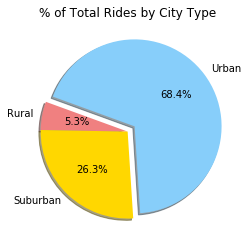

In [9]:
# Calculate Ride Percents
ride_df = combo_df.groupby(['type'])
ride_data = ride_df['ride_id'].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0,0.1)
colors = ["lightcoral", "gold", "lightskyblue"]
plt.pie(ride_data, startangle = 160, explode = explode, labels = labels, colors=colors, 
        shadow = True, autopct = "%1.1f%%")

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/TotRidesbyCity.png")

In [10]:
# Show Figure
plt.show()

## Total Drivers by City Type

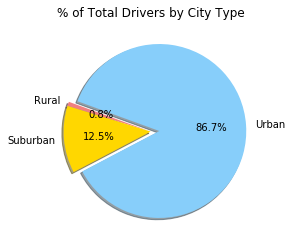

In [11]:
# Calculate Driver Percents
driver_df = combo_df.groupby(['type'])
driver_data = driver_df['driver_count'].sum()

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0,0.1)
colors = ["lightcoral", "gold", "lightskyblue"]
plt.pie(driver_data, startangle = 160, explode = explode, labels = labels, colors=colors, 
        shadow = True, autopct = "%1.1f%%")

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Images/DriversbyCity.png")

In [12]:
# Show Figure
plt.show()